In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi
import scipy
from scipy.sparse import csr_matrix, csc_matrix, linalg as sla

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

Bands to calculate:  10


/home/alvaro/github/tangent-boundaries/tangent_boundaries.py:1553: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


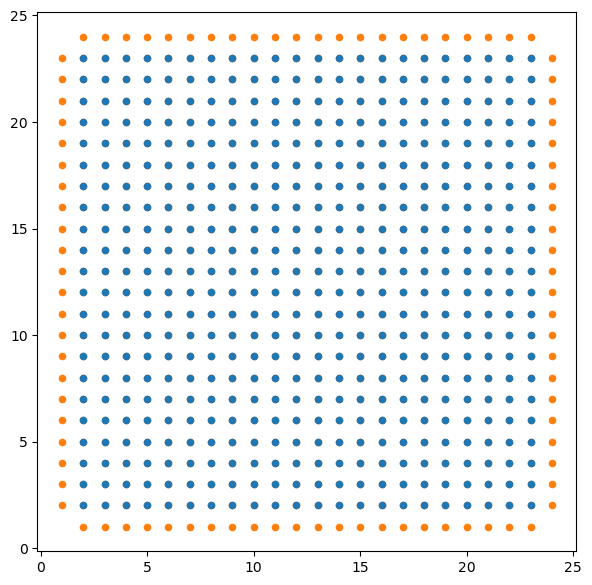

In [2]:
i = 0
Nx = 25 #Assume translational invariance in x direction
Ny = 25
nbands = 10
print('Bands to calculate: ',nbands)
mass=0.2

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    mass = mass,
    theta = -(pi/2)*(i/100),
)

ener, states, degenerate_indices = tb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=True)

In [18]:
# Now I want to see the evolution of the lowest eigenvalues as we change the sides with constant area
# Let us pick area = 35^2

area = 35*35 ###ACTUALLYYY THE SQUARE ITSELF WILL NOT HAVE EXACTLY THAT AREA
nbands = 10
parameters = dict()
parameters['theta'] = -pi/2
parameters['mass'] = 0.05

sides = [x for x in range(5,35) if abs(x*round(35*35/x)/(35*35)-1)<0.001]
print(sides)

spectrum = np.zeros((len(sides),nbands))

for j,Nx in enumerate(sides):
    print(j)
    parameters['Nx'] = Nx
    parameters['Ny'] = int(area/Nx)

    ener, states, degenerate_indices = tb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
    spectrum[j] = np.sort(ener)

[5, 7, 25]


/tmp/ipykernel_44477/1718341376.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


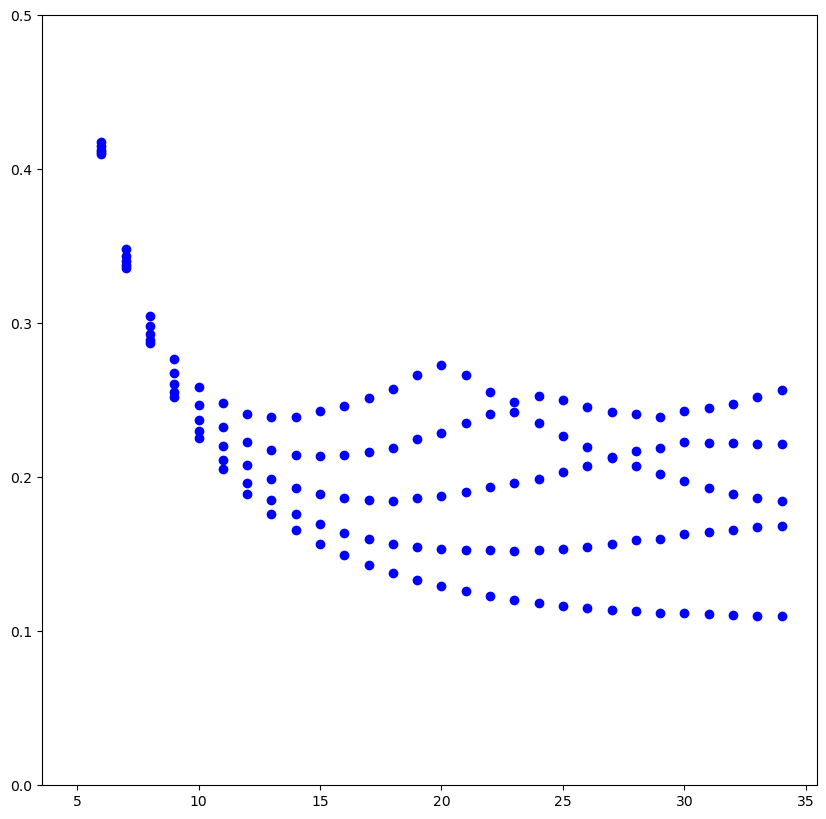

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
for i in range(10):
    ax.scatter(np.array(sides),spectrum[:,i],c = 'blue')
    ax.set_ylim(0,0.5)
fig.show()

In [24]:
# Good! It seems to agree at least qualitatively!

In [3]:
# Now I want to see the evolution of the lowest eigenvalues as we change the sides with constant area
# Let us pick area = 35^2

scale_factor = 100

area = scale_factor*scale_factor 
nbands = 10
parameters = dict()
parameters['theta'] = -pi/2
parameters['mass'] = 1/scale_factor

sides = [x for x in range(scale_factor,5*scale_factor,1) if abs(x*round(scale_factor**2/x)/(scale_factor**2)-1)<0.005]
print(len(sides))

# spectrum = np.zeros((len(sides),nbands))

# for j,Lx in enumerate(sides):
#     print(j)
#     parameters['Nx'] = Lx+2
#     parameters['Ny'] = int(area/Lx+2)

#     ener, states, degenerate_indices = tb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
#     spectrum[j] = np.sort(ener)

165


/tmp/ipykernel_4687/1647696612.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


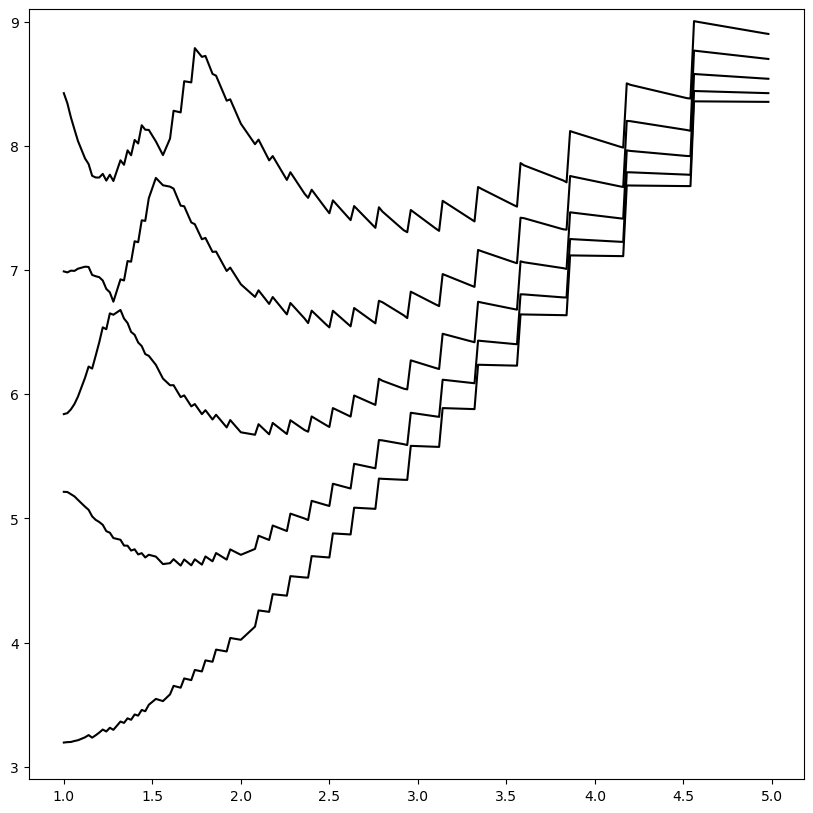

In [36]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
for i in range(10):
    ax.plot(np.array(sides)/scale_factor,scale_factor*spectrum[:,i],c = 'black')
    ax.set_ylim(2.9,9.1)
fig.show()

In [31]:
# Now I want to see the evolution of the lowest eigenvalues as we change the sides with constant area
# Let us pick area = 35^2

scale_factor = 50

area = scale_factor*scale_factor 
nbands = 10
parameters = dict()
parameters['theta'] = -pi/2
parameters['mass'] = 1/scale_factor

sides = [x for x in range(scale_factor,5*scale_factor,1) if abs(x*round(scale_factor**2/x)/(scale_factor**2)-1)<0.002]
print(len(sides))

spectrum2 = np.zeros((len(sides),nbands))

for j,Lx in enumerate(sides):
    print(j)
    parameters['Nx'] = Lx+2
    parameters['Ny'] = int(area/Lx+2)

    ener, states, degenerate_indices = tb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
    spectrum2[j] = np.sort(ener)

17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/tmp/ipykernel_4687/752290684.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


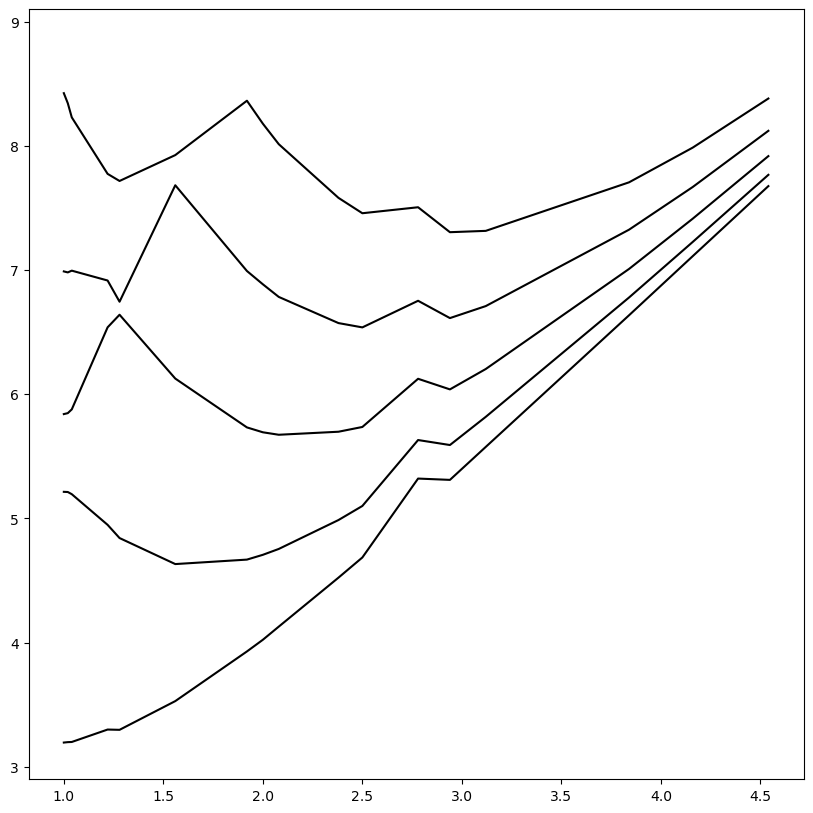

In [33]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
for i in range(10):
    ax.plot(np.array(sides)/scale_factor,scale_factor*spectrum2[:,i],c = 'black')
    ax.set_ylim(2.9,9.1)
fig.show()

In [26]:
#Now consider the first eigenvalue lambda and plot lambda^2-m^2 as a function of m for some specific rectangle

In [6]:
P = 4
print(P/4+np.sqrt((P/4)**2-1))

P = 4.489
print(P/4+np.sqrt((P/4)**2-1))

P = 5.7559
print(P/4+np.sqrt((P/4)**2-1))

1.0
1.6316074996993761
2.473696726178106


In [28]:
P = 4.489

Lx = int((P/4+np.sqrt((P/4)**2-1))*scale_factor)
Ly = int(scale_factor**2/Lx)
options = np.zeros((40,2))
for i, scale_factor in enumerate([x for x in range(40,80)]):
    Lx = int((P/4+np.sqrt((P/4)**2-1))*scale_factor)
    Ly = int(scale_factor**2/Lx)
    options[i] = np.array([scale_factor,abs((Lx*Ly-scale_factor**2)/scale_factor**2)])
    print([scale_factor,abs((Lx*Ly-scale_factor**2)/scale_factor**2)])
    
print(options[options[:,1].argsort()])

[40, 0.025]
[41, 0.018441403926234383]
[42, 0.036281179138321996]
[43, 0.01568415359653867]
[44, 0.00981404958677686]
[45, 0.02666666666666667]
[46, 0.007561436672967864]
[47, 0.0022634676324128564]
[48, 0.018229166666666668]
[49, 0.012911286963765098]
[50, 0.028]
[51, 0.010765090349865437]
[52, 0.005917159763313609]
[53, 0.02029191883232467]
[54, 0.00411522633744856]
[55, 0.02909090909090909]
[56, 0.013392857142857142]
[57, 0.02677746999076639]
[58, 0.021997621878715814]
[59, 0.007181844297615628]
[60, 0.0030555555555555557]
[61, 0.015587207739854878]
[62, 0.0015608740894901144]
[63, 0.02343159486016629]
[64, 0.009765625]
[65, 0.021538461538461538]
[66, 0.017447199265381085]
[67, 0.0044553352639786145]
[68, 0.0008650519031141869]
[69, 0.011972274732199117]
[70, 0.022857142857142857]
[71, 0.01904384050783575]
[72, 0.006944444444444444]
[73, 0.017451679489585287]
[74, 0.013878743608473338]
[75, 0.002311111111111111]
[76, 0.012465373961218837]
[77, 0.009107775341541575]
[78, 0.0189020381

In [14]:
P = 4.489
scale_factor = 68
Lx = int((P/4+np.sqrt((P/4)**2-1))*scale_factor)
Ly = int(scale_factor**2/Lx)
nbands = 2
parameters = dict()


parameters['theta'] = -pi/2
parameters['Nx'] = Lx+2
parameters['Ny'] = Ly+2


masses = [x/scale_factor for x in np.linspace(0,10,20)]
print(Lx,Ly)
print(abs((Lx*Ly-scale_factor**2)/scale_factor**2))
print(len(masses))


# spectrum = np.zeros((len(masses),nbands))

# for j,mass in enumerate(masses):
#     print(j)
#     parameters['mass'] = mass

#     ener, states, degenerate_indices = tb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
#     spectrum[j] = np.sort(ener)

110 42
0.0008650519031141869
20


In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
for i in range(nbands):
    ax.scatter(np.array(masses)*scale_factor,scale_factor**2*(spectrum[:,i]**2-np.array(masses)**2),c = 'C0', marker = 'h')
    ax.set_ylim(7,30)
fig.show()